<font color="#6E6E6E"><h2 align="left">Regresión lineal</h2></font>

Modelos sencillos de regresión lineal para predecir el valor de una variable y a partir de otra x.

In [1]:
import numpy as np
import numpy.matlib as matl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.random.seed(13)

Lo que viene a continuación es la definición de la función que usaremos para crear los conjuntos de datos, que hemos llamado *createDataSet*. La función necesita los tres argumentos que se describen a continuación:

- *n* es el número de puntos a generar
- *s* es la magnitud del ruido
- *model* es el modelo que genera los datos, puede ser 'linear', 'square' o 'sine'

In [2]:
def createDataSet(n,s,model):
    x = np.random.rand(n, 1)*2.0*np.pi

    if model == 'sine':
        y = np.sin(x) + np.random.randn(n, 1)*s
    elif model == 'linear':
        y = x + np.random.randn(n, 1)*s
    elif model == 'square':
        y = x*x + np.random.randn(n, 1)*s
    else:
        y = x + np.random.randn(n, 1)*s

    return x, y

También vamos a crear una función para dibujar gráficas.

In [3]:
def plotData(x,y,style,taxis,title):
    plt.plot(x,y,style)
    plt.grid(True)
    plt.axis(taxis)
    plt.xlabel("x")
    plt.ylabel("t")
    plt.title(title)

En primer lugar vamos a crear un problema lineal con dos conjuntos de datos, uno de entrenamiento y otro de test.

In [4]:
noise = 0.2
model = 'linear'
xtrain, ytrain = createDataSet(10, noise, model)
xtest, ytest = createDataSet(10, noise, model)

La siguiente celda muestra las gráficas de y frente a x para los dos conjuntos de datos generados.

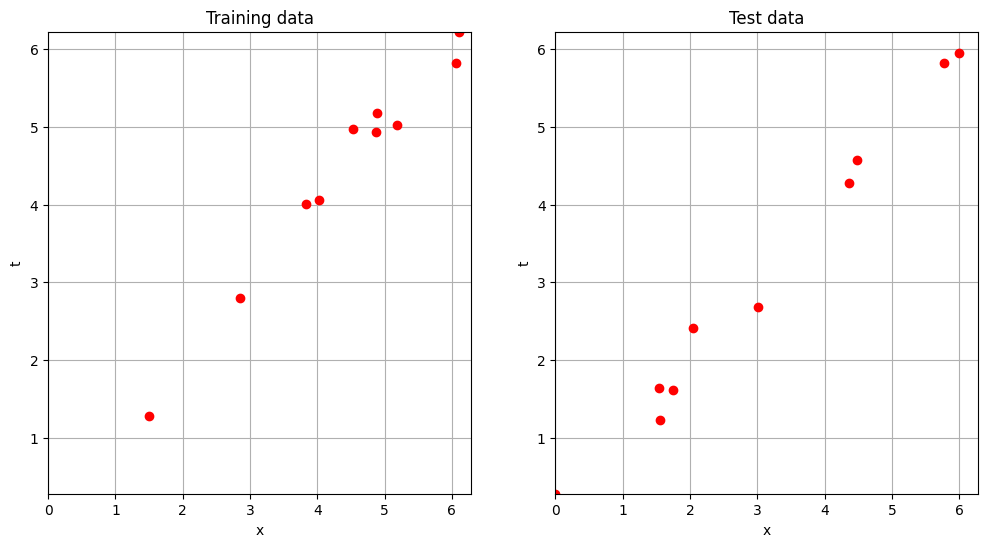

In [5]:
# Ejes comunes a las dos figuras:
taxis = [0, 2*np.pi, min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())]

plt.figure(figsize=(12,6))

# Figura para los datos de training:
plt.subplot(121)
plotData(xtrain,ytrain,'ro',taxis,"Training data")

# Figura para los datos de test:
plt.subplot(122)
plotData(xtest,ytest,'ro',taxis,"Test data")

A continuación creamos el modelo de regresión utilizando la clase <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a>.

In [6]:
clf = LinearRegression()

Para ajustar el modelo a los datos utilizamos el método *fit* pasándole los datos del conjunto de entrenamiento.

In [7]:
clf.fit(xtrain, ytrain)

LinearRegression()

A continuación vamos a aplicar el modelo para predecir la variable y a partir de x, tanto en los datos de entrenamiento como en los de test. Para eso usamos el método *predict*.

In [8]:
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

Ahora vamos a calcular el error cometido tanto en el conjunto de entrenamiento como en el de test. Para ello comparamos los valores reales de *y* con los obtenidos a partir del modelo.

In [9]:
print("Score en entrenamiento = %f" % (clf.score(xtrain, ytrain)))
print("Score en test = %f" % (clf.score(xtest, ytest)))

Score en entrenamiento = 0.978082
Score en test = 0.984614


Y finalmente vamos a volver a pintar los datos, pero superponiendo una gráfica que representa el modelo obtenido (línea azul).

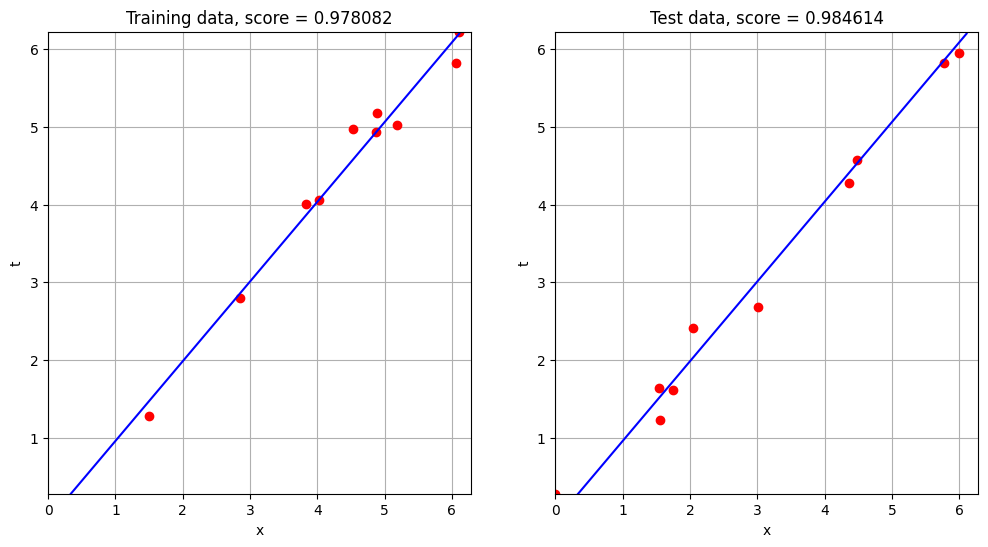

In [10]:
# Variables para el plot del modelo
xplot = np.linspace(min(xtrain.min(),xtest.min()),max(xtrain.max(),xtest.max()),num=100)[:, None]
yplot = clf.predict(xplot)

plt.figure(figsize=(12,6))

# Figura para los datos de training:
plt.subplot(121)
plotData(xtrain,ytrain,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Training data, score = %f" % (clf.score(xtrain, ytrain)))

# Figura para los datos de test:
plt.subplot(122)
plotData(xtest,ytest,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Test data, score = %f" % (clf.score(xtest, ytest)))

Parámetros del modelo:

In [11]:
print(f"w = {clf.coef_}, b = {clf.intercept_}")

w = [[1.02523027]], b = [-0.06642368]


La celda que sigue contiene todo el código anterior junto, para que te resulte más fácil hacer pruebas. Puedes obtener distintos conjuntos de datos y ajustar distintos modelos simplemente editando el código que aparece en ella. Los comentarios en el código indican los parámetros con los que te sugerimos que juegues. Haz las pruebas necesarias y responde a las preguntas planteadas al final.

Score en entrenamiento = 0.978082
Score en test = 0.984614
w = [[1.02523027]], b = [-0.06642368]


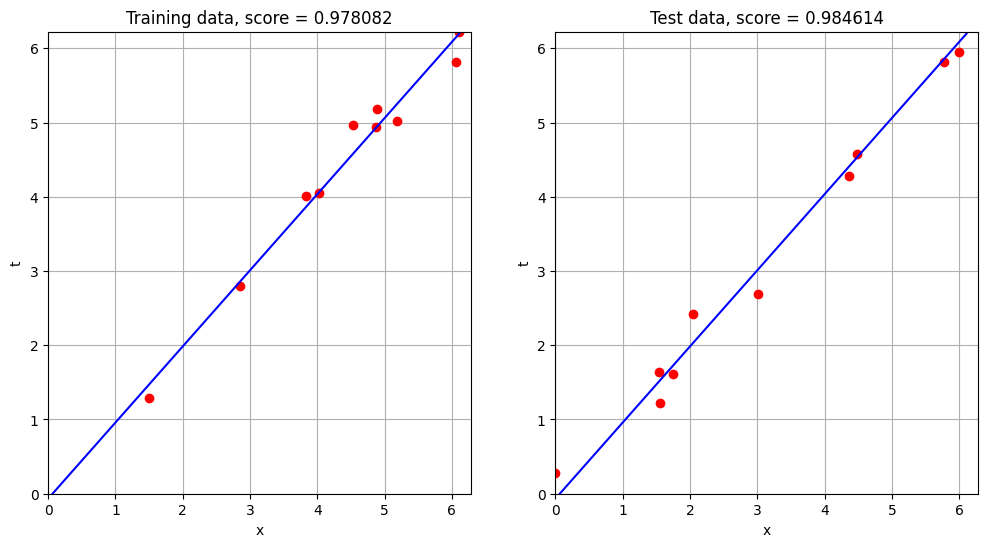

In [12]:
# Generación de los datos:
# Puedes jugar con el tipo de modelo, 'linear', 'sine' o 'square', y con
# el nivel de ruido.
np.random.seed(13)
noise = 0.2
model = 'linear'
xtrain, ytrain = createDataSet(10,noise,model)
xtest, ytest = createDataSet(10,noise,model)

# Construcción del modelo:
# Puedes jugar con los parámetros de KernelRidge.
clf = LinearRegression()
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

# Cálculo de la bondad del ajuste:
print("Score en entrenamiento = %f" % (clf.score(xtrain, ytrain)))
print("Score en test = %f" % (clf.score(xtest, ytest)))

# Variables para el plot del modelo
xplot = np.linspace(min(xtrain.min(),xtest.min()),max(xtrain.max(),xtest.max()),num=100)[:, None]
yplot = clf.predict(xplot)

# Gráficas:
taxis = [0, 2*np.pi, 0, max(ytrain.max(), ytest.max())]
plt.figure(figsize=(12,6))

# Para los datos de training:
plt.subplot(121)
plotData(xtrain,ytrain,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Training data, score = %f" % (clf.score(xtrain, ytrain)))

# Para los datos de test:
plt.subplot(122)
plotData(xtest,ytest,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Test data, score = %f" % (clf.score(xtest, ytest)))

print(f"w = {clf.coef_}, b = {clf.intercept_}")

### Ejercicios:

(1) Calcula los parámetros de la regresión manualmente, y compara los resultados con los anteriores.

(2) Prueba con diferentes niveles de ruido y diferente número de puntos y observa el score en training y test.

(3) Repite las pruebas anteriores con los otros dos tipos de problemas ('square' y 'sine') y explica lo que observas. ¿Es posible resolverlos con modelos lineales?

### Resolución de problemas no lineales

Score en entrenamiento = 0.935438
Score en test = 0.939569
w = [[6.22225551]], b = [-6.18726481]


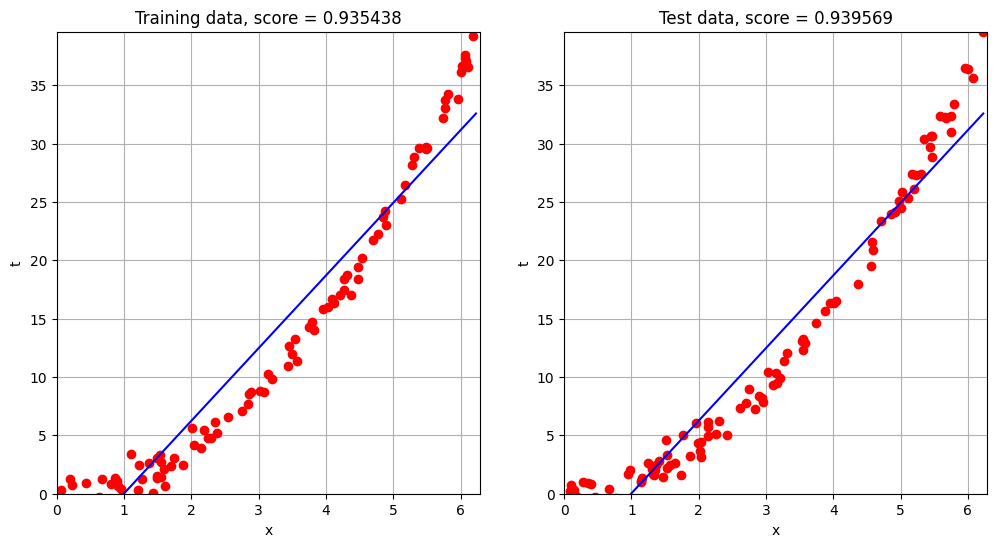

In [13]:
# Generación de los datos:
# Puedes jugar con el tipo de modelo, 'linear', 'sine' o 'square', y con
# el nivel de ruido.
np.random.seed(13)
noise = 0.9
model = 'square'
xtrain, ytrain = createDataSet(100,noise,model)
xtest, ytest = createDataSet(100,noise,model)

# Construcción del modelo:
# Puedes jugar con los parámetros de KernelRidge.
clf = LinearRegression()
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

# Cálculo de la bondad del ajuste:
print("Score en entrenamiento = %f" % (clf.score(xtrain, ytrain)))
print("Score en test = %f" % (clf.score(xtest, ytest)))

# Variables para el plot del modelo
xplot = np.linspace(min(xtrain.min(),xtest.min()),max(xtrain.max(),xtest.max()),num=100)[:, None]
yplot = clf.predict(xplot)

# Gráficas:
taxis = [0, 2*np.pi, 0, max(ytrain.max(), ytest.max())]
plt.figure(figsize=(12,6))

# Para los datos de training:
plt.subplot(121)
plotData(xtrain,ytrain,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Training data, score = %f" % (clf.score(xtrain, ytrain)))

# Para los datos de test:
plt.subplot(122)
plotData(xtest,ytest,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Test data, score = %f" % (clf.score(xtest, ytest)))

print(f"w = {clf.coef_}, b = {clf.intercept_}")

Transformación previa, no lineal, de los datos.

In [14]:
transform_attributes = lambda x: np.concatenate([x, x**2], axis=1)

phitrain = transform_attributes(xtrain)
phitest = transform_attributes(xtest)

Regresión lineal en el nuevo espacio de atributos:

Score en entrenamiento = 0.996117
Score en test = 0.993921
w = [[-0.10299891  1.01555093]], b = [-0.06012274]


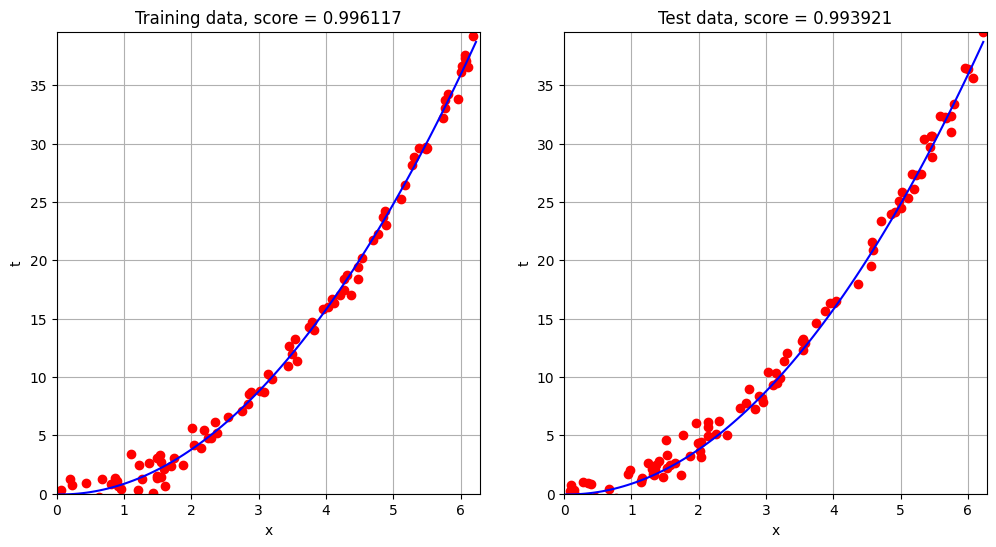

In [15]:
clf = LinearRegression()
clf.fit(phitrain, ytrain)
ytrain_pred = clf.predict(phitrain)
ytest_pred = clf.predict(phitest)

# Cálculo de la bondad del ajuste:
print("Score en entrenamiento = %f" % (clf.score(phitrain, ytrain)))
print("Score en test = %f" % (clf.score(phitest, ytest)))

# Variables para el plot del modelo
xplot = np.linspace(min(xtrain.min(),xtest.min()),max(xtrain.max(),xtest.max()),num=100)[:, None]
phiplot = transform_attributes(xplot)
yplot = clf.predict(phiplot)

# Gráficas:
taxis = [0, 2*np.pi, 0, max(ytrain.max(), ytest.max())]
plt.figure(figsize=(12,6))

# Para los datos de training:
plt.subplot(121)
plotData(xtrain,ytrain,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Training data, score = %f" % (clf.score(phitrain, ytrain)))

# Para los datos de test:
plt.subplot(122)
plotData(xtest,ytest,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Test data, score = %f" % (clf.score(phitest, ytest)))

print(f"w = {clf.coef_}, b = {clf.intercept_}")

### Sobre la complejidad del modelo

Score en entrenamiento = 0.994526
Score en test = -2413.782854
w = [[-2.52797433e+02  3.61789292e+02 -2.62318220e+02  1.06026902e+02
  -2.41579752e+01  2.89682035e+00 -1.41876261e-01]], b = [68.70219928]


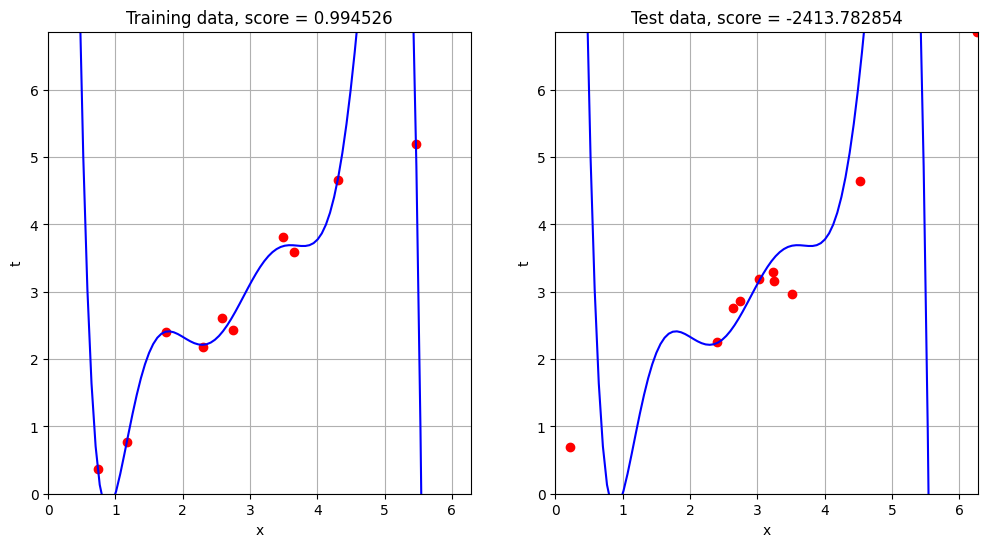

In [16]:
# Generación de los datos:
np.random.seed(25)
noise = 0.3
model = 'linear'
xtrain, ytrain = createDataSet(10, noise,model)
xtest, ytest = createDataSet(10, noise,model)

# Modelo:
transform_attributes = lambda x: np.concatenate([x, x**2, x**3, x**4, x**5, x**6, x**7], axis=1)

phitrain = transform_attributes(xtrain)
phitest = transform_attributes(xtest)

clf = LinearRegression()
clf.fit(phitrain, ytrain)
ytrain_pred = clf.predict(phitrain)
ytest_pred = clf.predict(phitest)

# Cálculo de la bondad del ajuste:
print("Score en entrenamiento = %f" % (clf.score(phitrain, ytrain)))
print("Score en test = %f" % (clf.score(phitest, ytest)))

# Variables para el plot del modelo
xplot = np.linspace(min(xtrain.min(),xtest.min()),max(xtrain.max(),xtest.max()),num=100)[:, None]
phiplot = transform_attributes(xplot)
yplot = clf.predict(phiplot)

# Gráficas:
taxis = [0, 2*np.pi, 0, max(ytrain.max(), ytest.max())]
plt.figure(figsize=(12,6))

# Para los datos de training:
plt.subplot(121)
plotData(xtrain,ytrain,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Training data, score = %f" % (clf.score(phitrain, ytrain)))

# Para los datos de test:
plt.subplot(122)
plotData(xtest,ytest,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Test data, score = %f" % (clf.score(phitest, ytest)))

print(f"w = {clf.coef_}, b = {clf.intercept_}")

### Bias-variance tradeoff

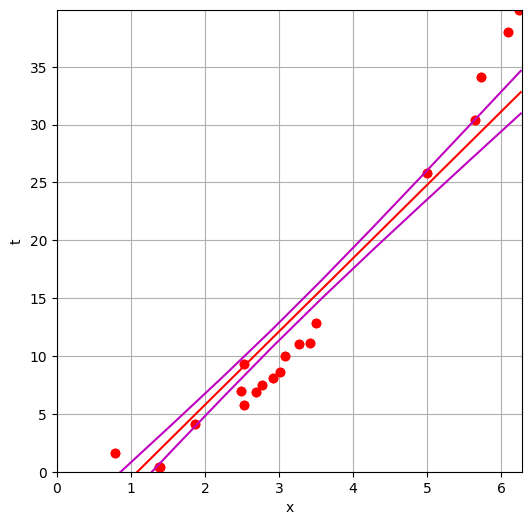

In [17]:
num_models = 100
np.random.seed(25)
noise = 0.9
nsamples = 20
model = 'square'
transform_attributes = lambda x: np.concatenate([x], axis=1)
xplot = np.linspace(min(xtrain.min(),xtest.min()),max(xtrain.max(),xtest.max()),num=10)[:, None]
phiplot = transform_attributes(xplot)
yplot = []

for i in range(num_models):
  x, y = createDataSet(nsamples, noise, model)

  phi = transform_attributes(x)
  clf = LinearRegression()
  clf.fit(phi, y)
  yplot.append(clf.predict(phiplot))

# Gráficas:
taxis = [0, 2*np.pi, 0, y.max()]
plt.figure(figsize=(6,6))
plotData(x, y, 'ro', taxis, "")
#for yp in yplot:
#  plotData(xplot, yp, 'b-', taxis, "")
plotData(x, y, 'ro', taxis, "")

m = np.mean(yplot, axis=0)
s = np.std(yplot, axis=0)
plotData(xplot, m, 'r-', taxis, "")
plotData(xplot, m+s, 'm-', taxis, "")
plotData(xplot, m-s, 'm-', taxis, "")
plt.show()

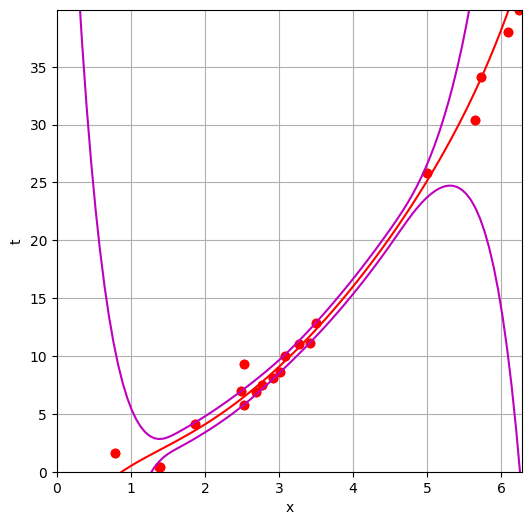

In [18]:
num_models = 100
np.random.seed(25)
noise = 0.9
nsamples = 20
model = 'square'
transform_attributes = lambda x: np.concatenate([x, x**2, x**3, x**4, x**5, x**6, x**7], axis=1)
xplot = np.linspace(min(xtrain.min(),xtest.min()),max(xtrain.max(),xtest.max()),num=100)[:, None]
phiplot = transform_attributes(xplot)
yplot = []

for i in range(num_models):
  x, y = createDataSet(nsamples, noise, model)

  phi = transform_attributes(x)
  clf = LinearRegression()
  clf.fit(phi, y)
  yplot.append(clf.predict(phiplot))

# Gráficas:
taxis = [0, 2*np.pi, 0, y.max()]
plt.figure(figsize=(6,6))
plotData(x, y, 'ro', taxis, "")
#for yp in yplot:
#  plotData(xplot, yp, 'b-', taxis, "")
plotData(x, y, 'ro', taxis, "")

m = np.mean(yplot, axis=0)
s = np.std(yplot, axis=0)
plotData(xplot, m, 'r-', taxis, "")
plotData(xplot, m+s, 'm-', taxis, "")
plotData(xplot, m-s, 'm-', taxis, "")
plt.show()

### Regularización

In [19]:
from sklearn.linear_model import Ridge

Score en entrenamiento = 0.992757
Score en test = 0.978152
w = [[ 1.3217284   1.8547786   0.64914831 -1.27863818  0.53291949 -0.08756233
   0.00507218]], b = [-2.59816524]


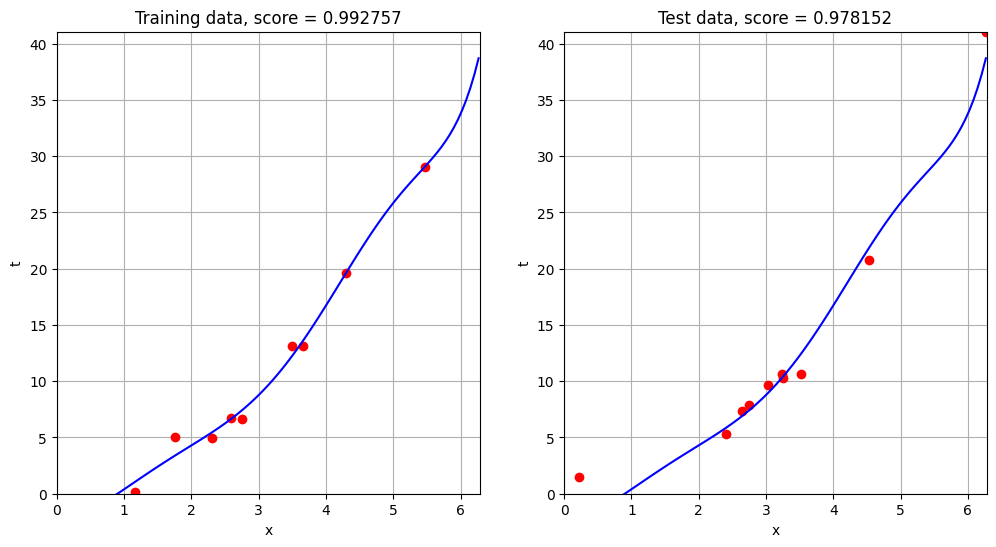

In [20]:
# Generación de los datos:
np.random.seed(25)
noise = 0.9
model = 'square'
xtrain, ytrain = createDataSet(10, noise,model)
xtest, ytest = createDataSet(10, noise,model)

# Modelo:
transform_attributes = lambda x: np.concatenate([x, x**2, x**3, x**4, x**5, x**6, x**7], axis=1)

phitrain = transform_attributes(xtrain)
phitest = transform_attributes(xtest)

clf = Ridge(alpha=0.1)
clf.fit(phitrain, ytrain)
ytrain_pred = clf.predict(phitrain)
ytest_pred = clf.predict(phitest)

# Cálculo de la bondad del ajuste:
print("Score en entrenamiento = %f" % (clf.score(phitrain, ytrain)))
print("Score en test = %f" % (clf.score(phitest, ytest)))

# Variables para el plot del modelo
xplot = np.linspace(min(xtrain.min(),xtest.min()),max(xtrain.max(),xtest.max()),num=100)[:, None]
phiplot = transform_attributes(xplot)
yplot = clf.predict(phiplot)

# Gráficas:
taxis = [0, 2*np.pi, 0, max(ytrain.max(), ytest.max())]
plt.figure(figsize=(12,6))

# Para los datos de training:
plt.subplot(121)
plotData(xtrain,ytrain,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Training data, score = %f" % (clf.score(phitrain, ytrain)))

# Para los datos de test:
plt.subplot(122)
plotData(xtest,ytest,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Test data, score = %f" % (clf.score(phitest, ytest)))

print(f"w = {clf.coef_}, b = {clf.intercept_}")

### Regresión lineal multidimensional

### Un problema un poco más realista: California Housing

Para terminar vamos a trabajar con una base de datos un poco más realista, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html">California Housing</a>. La siguiente celda de código carga los datos a partir del fichero *housingND.csv*.

In [21]:
from sklearn.datasets import fetch_california_housing
x, y = fetch_california_housing(return_X_y=True, as_frame=True)
print(x.shape)
print(y.shape)

(20640, 8)
(20640,)


Nos quedamos sólo con los primeros 1000 ejemplos para que las ejecuciones sean más rápidas.

In [22]:
x = x[:1000]
y = y[:1000]

Estandarizamos:

In [23]:
# Estandarizar los datos:
from sklearn.preprocessing import scale
x = scale(x, axis = 0)

Dividimos en training y test:

In [24]:
# Dividimos los datos en dos conjuntos, training y test:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=11)

Modelo lineal:

Score en entrenamiento = 0.622300
Score en test = 0.669647


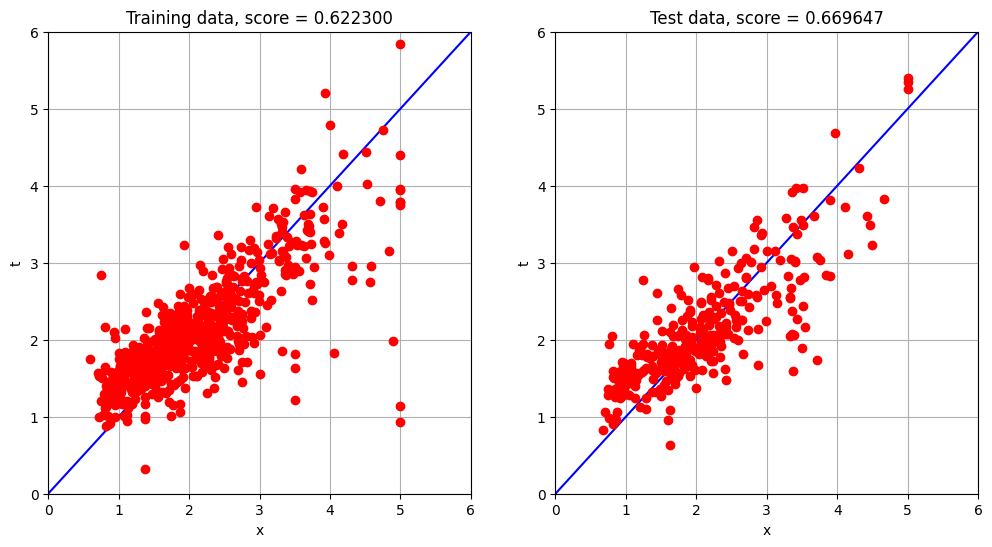

In [25]:
# Construcción de un modelo lineal:
clf = LinearRegression()
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

# Bondad del ajuste:
print("Score en entrenamiento = %f" % (clf.score(xtrain, ytrain)))
print("Score en test = %f" % (clf.score(xtest, ytest)))

# Dibujamos, para training y test, ypred frente a y:
plt.figure(figsize=(12,6))
taxis = [0, 6, 0 , 6]
xplot = [0, 6]

# Datos de training:
plt.subplot(121)
plotData(xplot, xplot, 'b-', taxis, "")
plotData(ytrain, ytrain_pred, 'ro', taxis, "Training data, score = %f" % (clf.score(xtrain, ytrain)))

# Datos de test:
plt.subplot(122)
plotData(xplot, xplot, 'b-', taxis, "")
plotData(ytest, ytest_pred, 'ro', taxis, "Test data, score = %f" % (clf.score(xtest, ytest)))

<font color="#6E6E6E"><h2 align="left">TO-DO: Modelos no lineales</h2></font>

<font color="#6E6E6E"><h2 align="left">TO-DO: Regresión logística</h2></font>